In [202]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pingouin as pg
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.metrics import classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.cluster import KMeans

In [68]:
import warnings
warnings.filterwarnings('ignore')

# Reading and summarizing the dataset

In [234]:
data = pd.read_excel('Muscular Data_Project_10.xlsx') # import the dataset
data.head()

,Age,creatine_Kinase,Hemopexin,Pyrovate_Kinase,Carrier
0,27,22.0,99.0,11.0,0
1,31,29.0,94.0,12.0,0
2,22,22.0,85.5,15.0,0
3,25,41.0,87.3,15.0,0
4,26,28.0,93.5,7.0,0


In [235]:
data['Carrier'].value_counts()

0    134
1     75
Name: Carrier, dtype: int64

In [236]:
data.describe()

,Age,creatine_Kinase,Hemopexin,Pyrovate_Kinase,Carrier
count,209.000000,209.000000,209.000000,201.000000,209.000000
mean,32.157895,92.260766,84.283828,16.109453,0.358852
std,8.572594,152.895531,17.063660,11.886882,0.480815
min,20.000000,15.000000,9.000000,3.000000,0.000000
25%,26.000000,30.000000,78.000000,10.000000,0.000000
50%,31.000000,41.000000,86.000000,14.000000,0.000000
75%,36.000000,73.000000,93.190000,17.000000,1.000000
max,61.000000,1288.000000,118.000000,110.000000,1.000000


# Data preprocessing

In [237]:
data = data.fillna(data.mean())   # Replace missing values with mean of that column
data.head()

,Age,creatine_Kinase,Hemopexin,Pyrovate_Kinase,Carrier
0,27,22.0,99.0,11.0,0
1,31,29.0,94.0,12.0,0
2,22,22.0,85.5,15.0,0
3,25,41.0,87.3,15.0,0
4,26,28.0,93.5,7.0,0


In [238]:
data.describe()

,Age,creatine_Kinase,Hemopexin,Pyrovate_Kinase,Carrier
count,209.000000,209.000000,209.000000,209.000000,209.000000
mean,32.157895,92.260766,84.283828,16.109453,0.358852
std,8.572594,152.895531,17.063660,11.656047,0.480815
min,20.000000,15.000000,9.000000,3.000000,0.000000
25%,26.000000,30.000000,78.000000,11.000000,0.000000
50%,31.000000,41.000000,86.000000,14.000000,0.000000
75%,36.000000,73.000000,93.190000,17.000000,1.000000
max,61.000000,1288.000000,118.000000,110.000000,1.000000


Text(0, 0.5, 'creatine kinase')

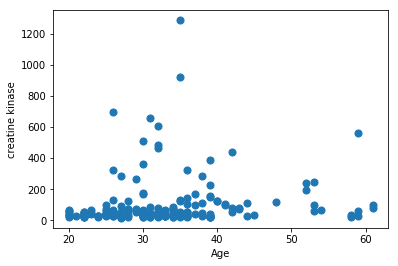

In [314]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1],  s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('creatine kinase')

Text(0, 0.5, 'hemopexin')

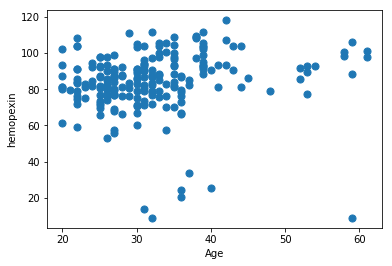

In [315]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 2],  s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('hemopexin')

Text(0, 0.5, 'pyrovate kinase')

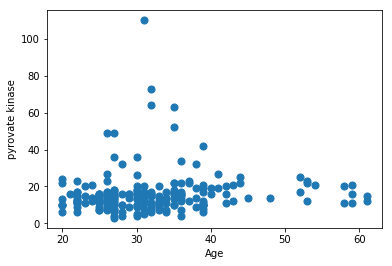

In [316]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 3],  s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('pyrovate kinase')

# Student's t-test

In [80]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    print('t=%.3f, df=%d, cv=%.12f, p=%.12f' % (t_stat, df, cv, p))
    # interpret via critical value
    if abs(t_stat) <= cv:
        print('Do not reject the null hypothesis that the means are equal.')
    else:
        print('Reject the null hypothesis that the means are equal.')
    # return everything
    #return t_stat, df, cv, p

### Testing the significance of 'Age' in determining whether a person is a carrier or not

In [81]:
data1 = data['Age'][data['Carrier'] == 0]
data2 = data['Age'][data['Carrier'] == 1]
independent_ttest(data1, data2, 0.05)

t=-7.465, df=207, cv=1.652248085993, p=0.000000000002
Reject the null hypothesis that the means are equal.


### Testing the significance of 'creatine_Kinase' in determining whether a person is a carrier or not

In [82]:
data1 = data['creatine_Kinase'][data['Carrier'] == 0]
data2 = data['creatine_Kinase'][data['Carrier'] == 1]
independent_ttest(data1, data2, 0.05)

t=-5.675, df=207, cv=1.652248085993, p=0.000000046400
Reject the null hypothesis that the means are equal.


### Testing the significance of 'Pyrovate_Kinase' in determining whether a person is a carrier or not

In [83]:
data1 = data['Pyrovate_Kinase'][data['Carrier'] == 0]
data2 = data['Pyrovate_Kinase'][data['Carrier'] == 1]
independent_ttest(data1, data2, 0.05)

t=-5.646, df=207, cv=1.652248085993, p=0.000000053770
Reject the null hypothesis that the means are equal.


### Testing the significance of 'Hemopexin' in determining whether a person is a carrier or not

In [84]:
data1 = data['Hemopexin'][data['Carrier'] == 0]
data2 = data['Hemopexin'][data['Carrier'] == 1]
independent_ttest(data1, data2, 0.05)

t=-1.296, df=207, cv=1.652248085993, p=0.196270816554
Do not reject the null hypothesis that the means are equal.


# Hotelling T-2 test

In [85]:
dvs = ['Age', 'creatine_Kinase','Hemopexin', 'Pyrovate_Kinase']
X = data[data['Carrier'] == 0][dvs]
Y = data[data['Carrier'] == 1][dvs]

In [91]:
print('Mean : Carrier = \'0\'')
print(X.mean())

Mean : Carrier = '0'
Age                28.813433
creatine_Kinase    39.130597
Hemopexin          82.944701
Pyrovate_Kinase    12.186567
dtype: float64


In [96]:
print('Variance-Covariance matrix : Carrier = \'0\'')
X.cov()

Variance-Covariance matrix : Carrier = '0'


,Age,creatine_Kinase,Hemopexin,Pyrovate_Kinase
Age,26.844630,-7.734850,12.204718,-2.506284
creatine_Kinase,-7.734850,335.691463,-76.397686,8.253647
Hemopexin,12.204718,-76.397686,151.877867,4.067688
Pyrovate_Kinase,-2.506284,8.253647,4.067688,18.619066


In [95]:
print('Mean : Carrier = \'1\'')
print(Y.mean())

Mean : Carrier = '1'
Age                 38.133333
creatine_Kinase    187.186667
Hemopexin           86.676400
Pyrovate_Kinase     23.118342
dtype: float64


In [98]:
print('Variance-Covariance matrix : Carrier = \'1\'')
Y.cov()

Variance-Covariance matrix : Carrier = '1'


,Age,creatine_Kinase,Hemopexin,Pyrovate_Kinase
Age,101.873874,-301.687387,1.949270,-37.203501
creatine_Kinase,-301.687387,50860.829550,378.055005,2419.618125
Hemopexin,1.949270,378.055005,536.400877,26.582781
Pyrovate_Kinase,-37.203501,2419.618125,26.582781,270.767389


In [122]:
ans = pg.multivariate_ttest(X, Y)
ans

,T2,F,df1,df2,pval
hotelling,176.642699,43.520665,4,204,2.235356e-26


In [121]:
alpha = 0.05
p = ans['pval'][0]
if p < alpha:
    print('Reject null hypothesis that the population mean vectors for the 2 groups are equal')
else:
    print('Do not reject null hypothesis that the population mean vectors for the 2 groups are equal')

Reject null hypothesis that the population mean vectors for the 2 groups are equal


# Logistic regression 

In [135]:
formula = ('Carrier ~ Age + creatine_Kinase + Hemopexin + Pyrovate_Kinase')
model = logit(formula = formula, data = data).fit()

Optimization terminated successfully.
         Current function value: 0.267681
         Iterations 10


In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Carrier   No. Observations:                  209
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            4
Date:                Sun, 08 Nov 2020   Pseudo R-squ.:                  0.5899
Time:                        18:52:41   Log-Likelihood:                -55.945
converged:                       True   LL-Null:                       -136.43
Covariance Type:            nonrobust   LLR p-value:                 9.096e-34
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.2006      2.081     -5.864      0.000     -16.278      -8.123
Age                 0.1815      0.040      4.589      0.000       0.104       0.259
creatine_Kinase     0.0413      0.011      3.738      0.000       0.020       0.063
Hemopexin           0.0096      0.013      0.756      0.450      -0.015       0.034
Pyrovate_Kinase     0.1675      0.052      3.221      0.001       0.066       0.269
===================================================================================
"""

In [137]:
prediction = model.predict(exog = data)
cutoff = 0.5
y_prediction = np.where(prediction > cutoff, 1, 0)
y_actual = data['Carrier']
conf_matrix = pd.crosstab(y_actual, y_prediction, rownames = ['Actual'], colnames = ['Predicted'], margins = True)
print(conf_matrix)

Predicted    0   1  All
Actual                 
0          130   4  134
1           18  57   75
All        148  61  209


In [139]:
accuracy = accuracy_score(y_actual, y_prediction)*100
print('Accuracy: %.2f' % accuracy + '%')

Accuracy: 89.47%


# Discriminant analysis

In [241]:
aggrp = []
d = data.copy()
for i in d.index:
    if d['Age'][i] <= 30:
        aggrp.append(0)
    else:
        aggrp.append(1)
d['Aggrp'] = aggrp
d = d.drop(['Age','Carrier'], axis=1)
d.head()

,creatine_Kinase,Hemopexin,Pyrovate_Kinase,Aggrp
0,22.0,99.0,11.0,0
1,29.0,94.0,12.0,1
2,22.0,85.5,15.0,0
3,41.0,87.3,15.0,0
4,28.0,93.5,7.0,0


In [242]:
d['Aggrp'].value_counts()

1    109
0    100
Name: Aggrp, dtype: int64

In [243]:
X = d[['creatine_Kinase','Hemopexin', 'Pyrovate_Kinase']]
Y = d['Aggrp']
LDA(n_components=1)
model = lda.fit(X, Y)

In [244]:
print(model.coef_)

[[0.00166447 0.0093969  0.00754929]]


In [245]:
precision_score(Y,pred)

0.6697247706422018

In [246]:
pred=model.predict(X)
conf_matrix = pd.crosstab(Y, pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)
print(conf_matrix)

Predicted    0    1  All
Actual                  
0           64   36  100
1           36   73  109
All        100  109  209


In [247]:
accuracy = accuracy_score(Y, pred)*100
mis = 100 - accuracy
print('Accuracy: %.2f' % accuracy + '%')
print('Misclassification rate: %.2f' % mis + '%')

Accuracy: 65.55%
Misclassification rate: 34.45%


# K-means classification

## Effect of age on creatine kinase, pyrovate kinase and hemopexin

In [298]:
X = data.drop(['Age','Carrier'], axis=1)
X.head()

,creatine_Kinase,Hemopexin,Pyrovate_Kinase
0,22.0,99.0,11.0
1,29.0,94.0,12.0
2,22.0,85.5,15.0
3,41.0,87.3,15.0
4,28.0,93.5,7.0


In [303]:
kmeans = KMeans(n_clusters=2, random_state=0)
y_kmean = kmeans.fit_predict(X)
y_kmean

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

Text(0, 0.5, 'hemopexin')

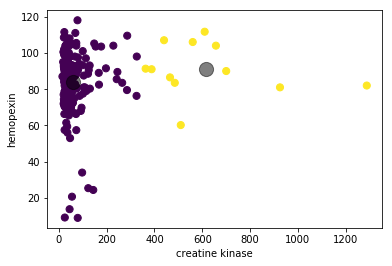

In [304]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmean, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('creatine kinase')
plt.ylabel('hemopexin')

In [310]:
c = 0
for i in range(data.shape[0]):
    if y_kmean[i] == 1:
        c = c + 1
print('Number of points in cluster 1 is', c)
print('Number of points in cluster 0 is', data.shape[0]-c)

Number of points in cluster 1 is 12
Number of points in cluster 0 is 197


In [313]:
c0 = 0
c1 = 0
for i in range(data.shape[0]):
    if y_kmean[i] == 0:
        c0 = c0 + data['Age'][i]
    else:
        c1 = c1 + data['Age'][i]
c1 = c1 / c
c0 = c0 / (data.shape[0]-c)
print('Mean age of cluster 0 is', c0)
print('Mean age of cluster 1 is', c1)

Mean age of cluster 0 is 31.96954314720812
Mean age of cluster 1 is 35.25


## Analysing whether a person is a carrier or not

In [292]:
X1 = data.drop(['Carrier'], axis=1)
X1.head()

,Age,creatine_Kinase,Hemopexin,Pyrovate_Kinase
0,27,22.0,99.0,11.0
1,31,29.0,94.0,12.0
2,22,22.0,85.5,15.0
3,25,41.0,87.3,15.0
4,26,28.0,93.5,7.0


In [259]:
kmeans = KMeans(n_clusters=2, random_state=0)
y_kmeans = kmeans.fit_predict(X1)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

Text(0, 0.5, 'creatine kinase')

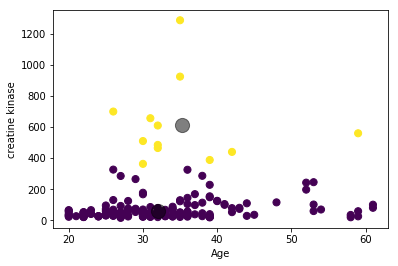

In [285]:
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('creatine kinase')

In [309]:
c = 0
for i in range(data.shape[0]):
    if y_kmeans[i] == 1:
        c = c + 1
print('Number of points in cluster 1 is', c)
print('Number of points in cluster 0 is', data.shape[0]-c)        

Number of points in cluster 1 is 12
Number of points in cluster 0 is 197


In [283]:
Y = data['Carrier']
pred = y_kmeans
conf_matrix = pd.crosstab(Y, pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)
print(conf_matrix)

Predicted    0   1  All
Actual                 
0          134   0  134
1           63  12   75
All        197  12  209
